# Chapter 1
Let's just plot something.

Figsize(6,6) 6 times 6 inches. 1 inch = 2.54 cm
Default `dpi=100`

Concept of rendering:


## From

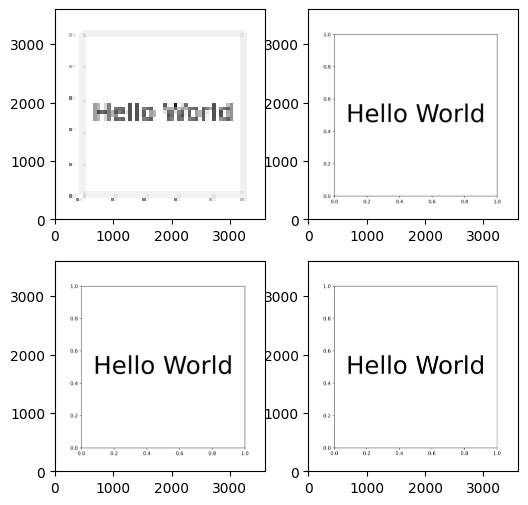

In [35]:
from matplotlib import pyplot as plt
from matplotlib import image

def figure_rendering(dpi=100):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.text(x=0.5, y=0.5, s="Hello World", fontsize=50, ha='center', va='center')
    fig.savefig(f"results/hello_world_{dpi:03}.png", dpi=dpi)
    plt.close()

for dpi in [10, 100, 300, 600]:
    figure_rendering(dpi)

image10 = image.imread("results/hello_world_010.png")
image100 = image.imread("results/hello_world_100.png")
image300 = image.imread("results/hello_world_300.png")
image600 = image.imread("results/hello_world_600.png")

height1, width1, _ = image10.shape
height2, width2, _ = image100.shape
height3, width3, _ = image300.shape
height4, width4, _ = image600.shape

common_width = max(width1, width2, width3, width4)
common_height = max(height1, height2, height3, height4)

fig, ax = plt.subplots(figsize=(6, 6), nrows=2, ncols=2)
ax[0, 0].imshow(image10, extent=[0, common_width, 0, common_height])
ax[0, 1].imshow(image100, extent=[0, common_width, 0, common_height])
ax[1, 0].imshow(image300, extent=[0, common_width, 0, common_height])
ax[1, 1].imshow(image600, extent=[0, common_width, 0, common_height])
plt.show()

## To

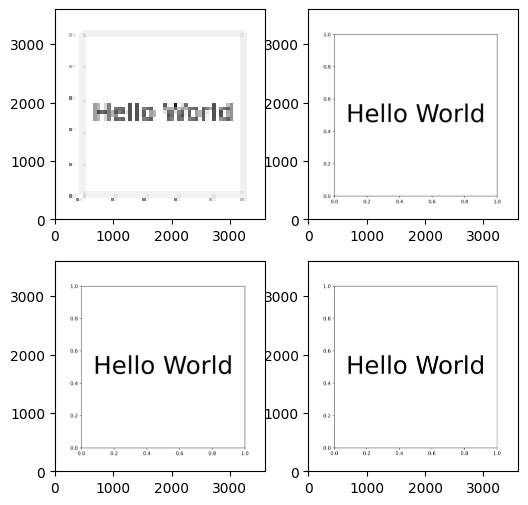

In [38]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from io import BytesIO

def render_hello_world_image(dpi):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.text(x=0.5, y=0.5, s="Hello World", fontsize=50, ha='center', va='center')

    # Save the figure to an in-memory BytesIO object
    img_buffer = BytesIO()
    fig.savefig(img_buffer, format='png', dpi=dpi)
    img_buffer.seek(0)

    # Read the image from the BytesIO object
    image = mpimg.imread(img_buffer)
    plt.close()

    return image

def get_common_size(images):
    heights, widths, _ = zip(*[img.shape for img in images])
    common_height = max(heights)
    common_width = max(widths)
    return common_width, common_height

def plot_images(images):
    num_images = len(images)
    ncols = int(num_images**0.5)
    nrows = (num_images + ncols - 1) // ncols

    fig, ax = plt.subplots(figsize=(6, 6), nrows=nrows, ncols=ncols)

    for i, img in enumerate(images):
        row = i // ncols
        col = i % ncols
        ax[row, col].imshow(img, extent=[0, common_width, 0, common_height])

    plt.show()

# Render hello world images
dpis = [10, 100, 300, 600]
hello_world_images = [render_hello_world_image(dpi) for dpi in dpis]

# Get common size
common_width, common_height = get_common_size(hello_world_images)

# Plot the images
plot_images(hello_world_images)